# Análisis en el Número de Visitantes Datatur en el municipio de Puebla por mes, 2019

<p style="text-align: justify">En el presente documento se realizará el proceso de análisis de datos sobre el tema <b>Número de visitantes Datatur en el municipio de Puebla, en el año 2019</b>, a través de la regresión lineal, con el afán de poner en práctica este tema en un contexto real; dando utilidad de Python para dicho análisis.</p>

<p style="text-align: justify">También es importante decir que los datos a ocupar se pueden encontrar en la paǵina de datos abiertos del Estado de Puebla, o en el siguiente <a href="https://datosabiertos.pueblacapital.gob.mx/node/508#{}">link</a>.</p>

<p style="text-align: justify">En fin, para iniciar este análisis comenzaremos exportando los datos del archivo <a href="https://drive.google.com/file/d/1qfWar4XKJn0O9_lZ-WMnwnLJ082Pkyv8/view?usp=sharing">visitantes.csv</a> al entorno de Python a través de la librería <b>pandas</b>, la cual nos permitirá visualizar la información en formato de tabla.</p>

In [1]:
# Importamos la librería de pandas
import pandas as pd

# Exponemos la información en formato tabla
data_frame = pd.read_csv('../data/visitantes.csv')
data_frame

,Año,Mes,Llegada de turistas,Porcentaje de ocupación,Estadía Promedio
0,2019,Enero,237929,55.21,1.98
1,2019,Febrero,219373,60.06,2.14
2,2019,Marzo,262852,61.84,1.83
3,2019,Abril,283212,60.90,1.88
4,2019,Mayo,273945,62.20,1.98
5,2019,Junio,255981,62.43,1.93
6,2019,Julio,272292,64.91,1.96
7,2019,Agosto,286666,63.51,1.83
8,2019,Septiembre,229840,61.49,1.93
9,2019,Octubre,231326,62.10,1.90


<p style="text-align: justify">De esta tabla únicamente nos enfocaremos en el apartado, con encabezado, <b>"Llegada de turistas"</b>, la cual es la que nos importa para poder graficarla, considerando los siguiente puntos:</p>

In [2]:
# Obtenemos nuestro sub-dataframe "Llegada de turistas"
turistas_por_mes = data_frame[["Llegada de turistas"]]
turistas_por_mes

,Llegada de turistas
0,237929
1,219373
2,262852
3,283212
4,273945
5,255981
6,272292
7,286666
8,229840
9,231326


<p style="text-align: justify">Donde $0=\text{Enero}$, $1=\text{Febrero}$ y así sucesivamente hasta considerar a $11=\text{Diciembre}$. Así, graficando los puntos tenemos lo siguiente:</p>

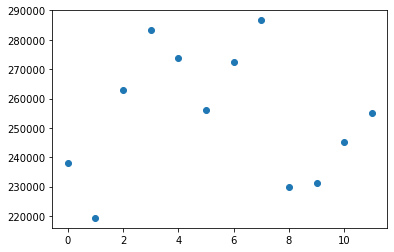

In [3]:
# Importamos nuestro módulo para poder gráficar
from pylab import *

# Graficamos los puntos
plot(turistas_por_mes,'o')

# Implementación de la Regresión Lineal

<p style="text-align: justify">Recordemos que la regresión lineal consiste en encontrar una ecuación líneal de la forma:</p>

$$
y=b_0 + b_1x
$$

<p style="text-align: justify">Tal que se ajuste e intente estar más cerca de todos los puntos antes mostrados. En pocas palabras, la solución consiste en encontrar los parámetros $b_0$ y $b_1$; lo cual es muy sencillo si tomamos en cuenta la siguiente expresión dada para $b_1$:</p>

$$
b_1=\frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}
$$

<p style="text-align: justify">Donde, al estar hablando del número de meses en un año, podemos concluir que $n=12$.</p>

<p style="text-align: justify">Y una vez encontrado el valor de $b_1$, nos bastará despejar para $b_0$ de la siguiente expresión:</p>

$$
\overline{y}=b_0 + b_1\overline{x}
$$

<p style="text-align: justify">Dicho esto, vamos a pasar a Python para poder encontrar dicha ecuación.</p>

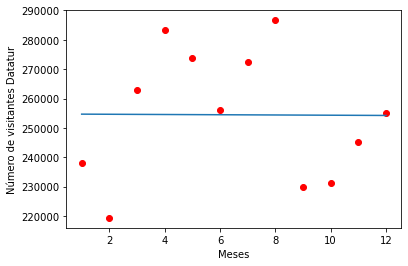

In [4]:
# Importamos los módulos a utilizar
import numpy as np
import matplotlib.pyplot as plt

def estimacion_b0_b1(x,y):
    n = np.size(x)
    
    #obtenemos el valor promedio de 'x' y de 'y'
    m_x, m_y = np.mean(x),np.mean(y)
    
    #Procedemos a calcular las sumatorias.
    sum_xy = np.sum((x-m_x)*(y-m_y))
    sum_xx = np.sum((x - m_x)**2)
    
    #Coeficientes de regresión
    b_1 = sum_xy / sum_xx
    b_0 = m_y - b_1 * m_x
    
    return(b_0,b_1)

# Función para graficar
def plot_regretion(x,y,b):
    plt.scatter(x,y,color = 'red')
    
    y_pred = b[0] + b[1]*x
    plt.plot(x,y_pred)
    
    plt.show()

# Código MAIN
def main():
    #Conjunto de datos
    x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
    y = np.array(data_frame["Llegada de turistas"])
    
    #Obtenemos b_1 y b_0
    b = estimacion_b0_b1(x,y)
    
    #Graficamos
    xlabel('Meses')
    ylabel('Número de visitantes Datatur')
    plot_regretion(x,y,b)
    
if __name__ == '__main__':
    main()

# Conclusión

<p style="text-align: justify">A partir de la regresión lineal logramos notar que tiene una ligera tendencia a que el número de visitantes disminuya, sin embargo se puede decir, también, que tiende a ser constante en un perfil conservador.</p>